In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
path = "ex5data1.mat"
data = loadmat(path)
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri Nov  4 22:27:26 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[-15.93675813],
        [-29.15297922],
        [ 36.18954863],
        [ 37.49218733],
        [-48.05882945],
        [ -8.94145794],
        [ 15.30779289],
        [-34.70626581],
        [  1.38915437],
        [-44.38375985],
        [  7.01350208],
        [ 22.76274892]]),
 'y': array([[ 2.13431051],
        [ 1.17325668],
        [34.35910918],
        [36.83795516],
        [ 2.80896507],
        [ 2.12107248],
        [14.71026831],
        [ 2.61418439],
        [ 3.74017167],
        [ 3.73169131],
        [ 7.62765885],
        [22.7524283 ]]),
 'Xtest': array([[-33.31800399],
        [-37.91216403],
        [-51.20693795],
        [ -6.13259585],
        [ 21.26118327],
        [-40.31952949],
        [-14.54153167],
        [ 32.55976024],
        [ 13.39343255],
        [ 44.20988595],
        [ -1.14267768],
        [-

In [3]:
X, y = data['X'], data['y']
Xtest, ytest = data['Xtest'], data['ytest']
Xval, yval = data['Xval'], data['yval']

X.shape, Xtest.shape, Xval.shape, y.shape

((12, 1), (21, 1), (21, 1), (12, 1))

Text(0.5, 1.0, 'Figure1:data')

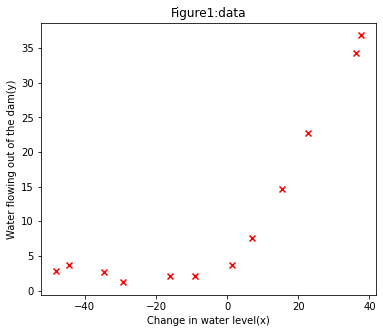

In [4]:
# visualizing the training dataset
plt.figure(figsize=(6, 5))
plt.scatter(X, y, marker='x', color='r')
plt.xlabel('Change in water level(x)')
plt.ylabel('Water flowing out of the dam(y)')
plt.title('Figure1:data')

In [5]:
# 令x0=1
X = np.insert(X, 0, np.ones(X.shape[0]), axis=1)
Xtest = np.insert(Xtest, 0, np.ones(Xtest.shape[0]), axis=1)
Xval = np.insert(Xval, 0, np.ones(Xval.shape[0]), axis=1)
# 合并成一句
# X, Xval, Xtest = [np.insert(x.reshape(x.shape[0], 1), 0, np.ones(x.shape[0]), axis=1) for x in (X, Xval, Xtest)]
X.shape, Xtest.shape, Xval.shape

((12, 2), (21, 2), (21, 2))

In [6]:
# cost function
def cost_func_reg(theta, X, y, lambda_reg):
    m = X.shape[0]
    theta = theta.reshape(1, theta.shape[0])
    temp1 = ((X @ theta.T) - y) ** 2   # 注意如果不将上一行的theta变为2维的，X @ theta.T 的shape为（12,）是一维，一维的array注意reshape成2维的
    temp2 = theta ** 2
    return (np.sum(temp1) + np.sum(temp2[1:]) * lambda_reg) / (2 * m)


In [7]:
theta = np.ones(X.shape[1])
lambda_reg = 1

In [8]:
cost_func_reg(theta, X, y, lambda_reg)

303.9515255535976

In [9]:
# the partial derivative of regularized linear regression
def grad_func_reg(theta, X, y, lambda_reg):
    m = X.shape[0]
    n = theta.shape[0]
    grad = np.zeros(theta.shape)
    theta = np.reshape(theta, (1, theta.shape[0]))
    part1 = X @ theta.T - y
    for j in range(n):
        part2 = part1 * X[:, j].reshape(X.shape[0], 1)
        if j == 0:
            grad[j] = np.sum(part2) / m
        else:
            grad[j] = np.sum(part2) / m + lambda_reg * theta[:, j] / m
    return grad

In [10]:
grad_func_reg(theta, X, y, lambda_reg)

array([-15.30301567, 598.25074417])

In [11]:
import scipy.optimize as opt

# 求theta的最优解
def train_linear_reg(theta, X, y, lambda_reg):
    result = opt.fmin_tnc(func=cost_func_reg, x0 = theta, fprime=grad_func_reg, args=(X, y, lambda_reg))
    return result[0]

result = train_linear_reg(theta, X, y, 0)
result

  NIT   NF   F                       GTG
    0    1  3.039515255535976E+02   3.58038434E+05
tnc: fscale = 0.000835613


array([13.08790324,  0.36777923])

    1    3  9.299577620594808E+01   1.36988337E+02
tnc: fscale = 0.0427197
    2    5  4.008670416374270E+01   2.25224866E+04
    3    7  2.237390649510896E+01   2.14311655E-11
tnc: fscale = 108006
tnc: |fn-fn-1] = 4.31145e-15 -> convergence
    4    9  2.237390649510895E+01   6.76245509E-14
tnc: Converged (|f_n-f_(n-1)| ~= 0)


Text(0.5, 1.0, 'Figure1: Linear Fit')

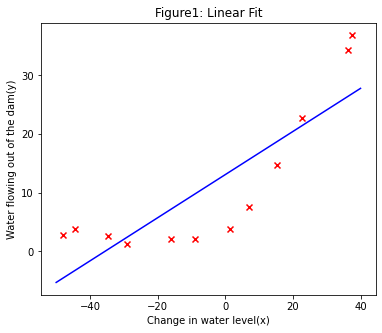

In [12]:
# 可以看到使用一次函数拟合数据欠拟合
final_theta = result
p_x = np.linspace(-50, 40, 100)
p_y = final_theta[0] + final_theta[1] * p_x

plt.figure(figsize=(6, 5))
plt.scatter(X[:, 1:], y, marker='x', color='r')
plt.plot(p_x, p_y, 'b')
plt.xlabel('Change in water level(x)')
plt.ylabel('Water flowing out of the dam(y)')
plt.title('Figure1: Linear Fit')

In [13]:
train_error = []
cv_error = []

In [14]:
m = X.shape[0]
# 计算训练误差和交叉验证误差
for i in range(1, m + 1):
    result = train_linear_reg(theta, X[:i, :], y[:i, :], 0)
    te  = cost_func_reg(result, X[:i, :], y[:i, :], 0)
    cve = cost_func_reg(result, Xval, yval, 0)
    train_error.append(te)
    cv_error.append(cve)

  NIT   NF   F                       GTG
    0    1  1.457106922645887E+02   7.43067003E+04
tnc: fscale = 0.00183424
    1    3  8.631534185484672E-18   4.40174166E-15
tnc: |pg| = 3.61706e-05 -> local minimum
    1    3  8.631534185484672E-18   4.40174166E-15
tnc: Local minima reach (|pg| ~= 0)
  NIT   NF   F                       GTG
    0    1  2.878623740891748E+02   3.18073041E+05
tnc: fscale = 0.000886557
    1    3  2.004821342908418E-01   3.16698305E-02
tnc: fscale = 2.80962
    2    5  1.406351957438132E-04   1.55393840E-01
    3    7  8.371044654825317E-18   7.81622440E-18
tnc: |pg| = 9.95065e-10 -> local minimum
    3    7  8.371044654825317E-18   7.81622440E-18
tnc: Local minima reach (|pg| ~= 0)
  NIT   NF   F                       GTG
    0    1  1.932434806358119E+02   1.68157035E+05
tnc: fscale = 0.00121931
    1    3  8.863206576484284E+01   1.68991143E+02
tnc: fscale = 0.0384625
    2    5  4.163125460796083E+01   3.39442090E+04
    3    7  3.286595045501299E+00   2.32

006
tnc: |fn-fn-1] = 4.31145e-15 -> convergence
    4    9  2.237390649510895E+01   6.76245509E-14
tnc: Converged (|f_n-f_(n-1)| ~= 0)


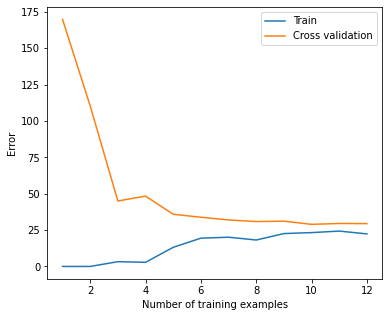

In [15]:
# high bias, underfitting
plt.figure(figsize=(6, 5))
plt.plot(np.arange(1, m + 1), train_error, label='Train') # 折线图
plt.plot(np.arange(1, m + 1), cv_error, label='Cross validation')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend()

In [16]:
X, y = data['X'], data['y']
Xtest, ytest = data['Xtest'], data['ytest']
Xval, yval = data['Xval'], data['yval']

X_orig = np.insert(X, 0, np.ones(X.shape[0]), axis=1)
Xtest_orig = np.insert(Xtest, 0, np.ones(Xtest.shape[0]), axis=1)
Xval_orig = np.insert(Xval, 0, np.ones(Xval.shape[0]), axis=1)

In [17]:
# normalization features
def normalization(X):
    return (X - X.mean(axis=0)) / X.std(axis=0)

In [18]:
# polynomial feature mapping
def poly_features(X, p):
    t = X[:, 0].reshape(X.shape[0], 1)
    X_t = X
    for i in range(2, p + 1):
        X_t =  np.append(X_t, np.power(t, i), axis=1)  # append追加一列
    return X_t

poly_features(X, 3)

array([[-1.59367581e+01,  2.53980260e+02, -4.04762197e+03],
       [-2.91529792e+01,  8.49896197e+02, -2.47770062e+04],
       [ 3.61895486e+01,  1.30968343e+03,  4.73968522e+04],
       [ 3.74921873e+01,  1.40566411e+03,  5.27014222e+04],
       [-4.80588295e+01,  2.30965109e+03, -1.10999128e+05],
       [-8.94145794e+00,  7.99496701e+01, -7.14866612e+02],
       [ 1.53077929e+01,  2.34328523e+02,  3.58705250e+03],
       [-3.47062658e+01,  1.20452489e+03, -4.18045609e+04],
       [ 1.38915437e+00,  1.92974986e+00,  2.68072045e+00],
       [-4.43837599e+01,  1.96991814e+03, -8.74323736e+04],
       [ 7.01350208e+00,  4.91892115e+01,  3.44988637e+02],
       [ 2.27627489e+01,  5.18142738e+02,  1.17943531e+04]])

In [19]:
degree = 8
X = normalization(poly_features(X, degree))
Xtest = normalization(poly_features(Xtest, degree))
Xval = normalization(poly_features(Xval, degree))

In [20]:
X, Xval, Xtest = [np.insert(x, 0, np.ones(x.shape[0]), axis=1) for x in (X, Xval, Xtest)]

In [21]:
X.shape, Xval.shape, Xtest.shape

((12, 9), (21, 9), (21, 9))

In [22]:
# 随着λ的变化，绘制相应的拟合图像
def plot_linear_fit(final_theta, X_orig, degree, lambda_reg):
    p_x = np.linspace(-50, 40, 100)
    p_y = final_theta[0]
    for i in range(1, degree + 1):
        p_y += final_theta[i] * normalization(np.power(p_x, i))  # 绘制假设函数时，要将X标准化，因为训练时使用的X是标准化后的

    plt.figure(figsize=(6, 5))
    plt.scatter(X_orig[:, 1:], y, marker='x', color='r')
    plt.plot(p_x, p_y, 'b')
    plt.xlabel('Change in water level(x)')
    plt.ylabel('Water flowing out of the dam(y)')
    
    plt.title(f'Linear Fit:  λ={lambda_reg}')
    
# 计算training error 和 cross validation error
def compute_error(theta, X, y, Xval, yval, lambda_reg):
    train_error = []
    cv_error = []
    for i in range(1, m + 1):
        result = train_linear_reg(theta, X[:i, :], y[:i, :], lambda_reg) # 注意：计算error时，所有的变量都必须是标准化后的
        te  = cost_func_reg(result, X[:i, :], y[:i, :], lambda_reg)
        cve = cost_func_reg(result, Xval, yval, lambda_reg)
        train_error.append(te)
        cv_error.append(cve)
    return train_error, cv_error

# 绘制学习曲线
def plot_learning_curve(train_error, cv_error):
    plt.figure(figsize=(6, 5))
    plt.plot(np.arange(1, m + 1), train_error, label='Train') # 折线图
    plt.plot(np.arange(1, m + 1), cv_error, label='Cross validation')
    plt.xlabel('Number of training examples')
    plt.ylabel('Error')
    plt.legend()

In [23]:
# λ = 0
theta = np.ones(X.shape[1])
lambda_reg = 0
final_theta = train_linear_reg(theta, X, y, lambda_reg)
train_error, cv_error = compute_error(theta, X, y, Xval, yval, lambda_reg)

  NIT   NF   F                       GTG
    0    1  1.036531744257878E+02   3.26008331E+02
tnc: fscale = 0.0276921
    1    5  2.802447211329754E+00   2.85566449E-01
tnc: fscale = 0.935656
    2    9  1.022187269467278E+00   6.57733420E-01
    3   14  4.259382022973721E-01   1.94987553E-03
    4   19  2.416580282181653E-01   5.71822433E-05
tnc: fscale = 66.121
    5   24  1.996543286410653E-01   3.77029147E-04
    6   29  1.950202113652133E-01   5.53616039E-03
    7   32  1.885710145998924E-01   5.03491430E-03
    8   37  1.797531075895823E-01   1.74018936E-04
    9   42  1.770376286598263E-01   3.79880125E-05
tnc: stepmx = 1000
   10   47  1.359139259818850E-01   1.26570933E-02
   11   50  1.212341279902822E-01   2.12185637E-02
   12   54  1.176903407600418E-01   7.38468587E-04
   13   59  1.111851711426937E-01   2.37713146E-04
   14   64  1.088424841910907E-01   1.74971213E-04
   15   69  1.083650711415936E-01   5.19770555E-05
   16   74  1.056683267100731E-01   6.81829137E-05
   17

  1    5  2.802447211329754E+00   2.85566449E-01
tnc: fscale = 0.935656
    2    9  1.022187269467278E+00   6.57733420E-01
    3   14  4.259382022973721E-01   1.94987553E-03
    4   19  2.416580282181653E-01   5.71822433E-05
tnc: fscale = 66.121
    5   24  1.996543286410653E-01   3.77029147E-04
    6   29  1.950202113652133E-01   5.53616039E-03
    7   32  1.885710145998924E-01   5.03491430E-03
    8   37  1.797531075895823E-01   1.74018936E-04
    9   42  1.770376286598263E-01   3.79880125E-05
tnc: stepmx = 1000
   10   47  1.359139259818850E-01   1.26570933E-02
   11   50  1.212341279902822E-01   2.12185637E-02
   12   54  1.176903407600418E-01   7.38468587E-04
   13   59  1.111851711426937E-01   2.37713146E-04
   14   64  1.088424841910907E-01   1.74971213E-04
   15   69  1.083650711415936E-01   5.19770555E-05
   16   74  1.056683267100731E-01   6.81829137E-05
   17   79  9.616761346760122E-02   9.22821745E-05
   18   82  9.599260504188201E-02   2.79621312E-05
   19   87  8.2165990

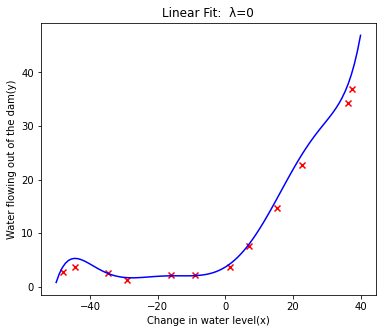

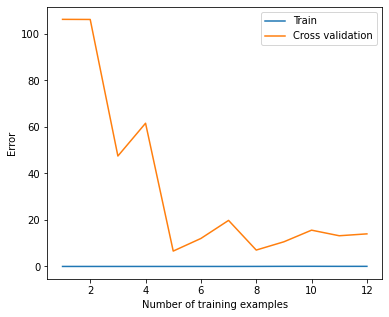

In [24]:
# 绘制拟合曲线
plot_linear_fit(final_theta, X_orig, degree, lambda_reg)

# 绘制学习曲线
plot_learning_curve(train_error, cv_error)

In [25]:
# λ = 1
theta = np.ones(X.shape[1])
lambda_reg = 1
final_theta = train_linear_reg(theta, X, y, lambda_reg)
train_error, cv_error = compute_error(theta, X, y, Xval, yval, lambda_reg)

  NIT   NF   F                       GTG
    0    1  1.036531744257878E+02   3.22257881E+02
tnc: fscale = 0.0278528
    1    5  3.231825097372241E+00   2.07795224E-01
tnc: fscale = 1.09686
    2    9  2.107410294301898E+00   7.22592492E-02
    3   14  1.958952582273055E+00   1.47331554E-04
tnc: fscale = 41.1929
    3   60  1.958952582273055E+00   1.47331554E-04
tnc: Linear search failed
  NIT   NF   F                       GTG
    0    1  5.500033832949540E+00   5.81194568E+01
    1    8  3.059311236982458E-02   2.01867055E-01
    2   11  1.240846591530252E-03   7.13068809E-03
    3   17  6.200703079547370E-07   1.50407018E-04
tnc: fscale = 40.7696
    4   23  1.578189269185338E-08   3.82808558E-06
    5   27  4.015345784201700E-10   9.74242148E-08
tnc: fscale = 1601.9
tnc: |fn-fn-1] = 3.91289e-10 -> convergence
    6   33  1.024532933070491E-11   2.48580547E-09
tnc: Converged (|f_n-f_(n-1)| ~= 0)
  NIT   NF   F                       GTG
    0    1  3.928475760898633E+00   2.73563123E+

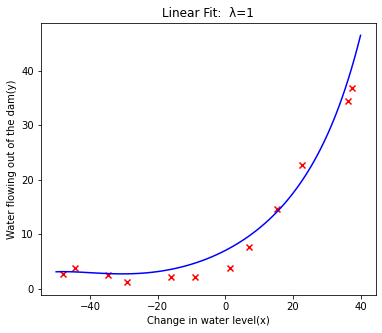

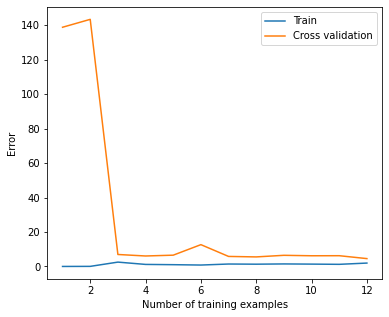

In [26]:
plot_linear_fit(final_theta, X_orig, degree, lambda_reg)

plot_learning_curve(train_error, cv_error)

In [27]:
# λ = 100
theta = np.ones(X.shape[1])
lambda_reg = 100
final_theta = train_linear_reg(theta, X, y, lambda_reg)
train_error, cv_error = compute_error(theta, X, y, Xval, yval, lambda_reg)

  NIT   NF   F                       GTG
    0    1  1.036531744257878E+02   5.00963402E+02
tnc: fscale = 0.0223392
    1    6  5.672762247021196E+01   5.04037131E-04
tnc: fscale = 22.2709
    2    9  5.672583552384466E+01   2.86818195E-10
tnc: fscale = 29523.4
    3   14  5.672581939724330E+01   4.49508487E-16
tnc: |pg| = 7.18129e-13 -> local minimum
    3   14  5.672581939724330E+01   4.49508487E-16
tnc: Local minima reach (|pg| ~= 0)
  NIT   NF   F                       GTG
    0    1  5.500033832949540E+00   8.14832383E+04
tnc: fscale = 0.0017516
    1   32  3.735302058009409E-02   1.02661108E+04
    1   74  3.735302058009409E-02   1.02661108E+04
tnc: Linear search failed
  NIT   NF   F                       GTG
    0    1  3.928475760898633E+00   2.05983507E+04
tnc: fscale = 0.0034838
    1   11  1.027521148869074E-01   1.24762295E+03
    1   55  1.027521148869074E-01   1.24762295E+03
tnc: Linear search failed
  NIT   NF   F                       GTG
    0    1  1.344694469236864E

= 22.2709
    2    9  5.672583552384466E+01   2.86818195E-10
tnc: fscale = 29523.4
    3   14  5.672581939724330E+01   4.49508487E-16
tnc: |pg| = 7.18129e-13 -> local minimum
    3   14  5.672581939724330E+01   4.49508487E-16
tnc: Local minima reach (|pg| ~= 0)


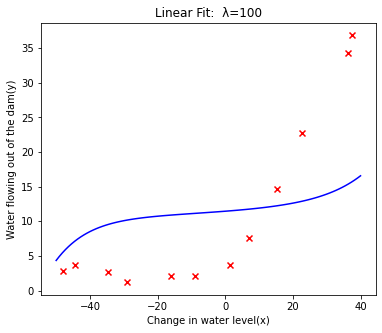

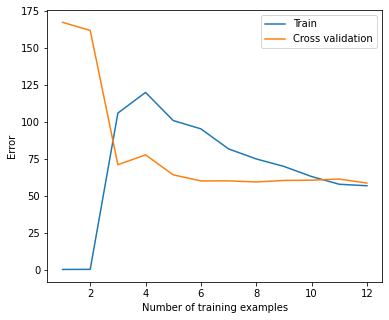

In [28]:
plot_linear_fit(final_theta, X_orig, degree, lambda_reg)

plot_learning_curve(train_error, cv_error)

In [29]:
lambda_range = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
train_error = []
cv_error = []
for i in lambda_range:
    temp_theta = train_linear_reg(theta, X, y, i)
    train_error.append(cost_func_reg(temp_theta, X, y, i))
    cv_error.append(cost_func_reg(temp_theta, Xval, yval, i))


  NIT   NF   F                       GTG
    0    1  1.036531744257878E+02   3.26008331E+02
tnc: fscale = 0.0276921
    1    5  2.802447211329754E+00   2.85566449E-01
tnc: fscale = 0.935656
    2    9  1.022187269467278E+00   6.57733420E-01
    3   14  4.259382022973721E-01   1.94987553E-03
    4   19  2.416580282181653E-01   5.71822433E-05
tnc: fscale = 66.121
    5   24  1.996543286410653E-01   3.77029147E-04
    6   29  1.950202113652133E-01   5.53616039E-03
    7   32  1.885710145998924E-01   5.03491430E-03
    8   37  1.797531075895823E-01   1.74018936E-04
    9   42  1.770376286598263E-01   3.79880125E-05
tnc: stepmx = 1000
   10   47  1.359139259818850E-01   1.26570933E-02
   11   50  1.212341279902822E-01   2.12185637E-02
   12   54  1.176903407600418E-01   7.38468587E-04
   13   59  1.111851711426937E-01   2.37713146E-04
   14   64  1.088424841910907E-01   1.74971213E-04
   15   69  1.083650711415936E-01   5.19770555E-05
   16   74  1.056683267100731E-01   6.81829137E-05
   17

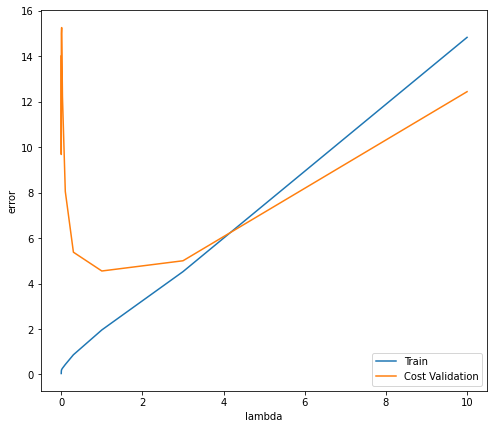

In [30]:
plt.figure(figsize=(8, 7))
plt.plot(lambda_range, train_error, label='Train')
plt.plot(lambda_range, cv_error, label='Cost Validation')
plt.xlabel('lambda')
plt.ylabel('error')
plt.legend()

# 最左边：overfitting 最右边:underfitting, λ大约等于3时，训练误差和验证误差相差较小且两者的值也较小，模型的效果最好

In [31]:
# 计算test error,  
for i in lambda_range:
    temp_theta = train_linear_reg(theta, X, y, i)
    teste = cost_func_reg(temp_theta, Xtest, ytest, i)
    print(f'test error(l = {i}) = {teste}')
    
# 可以看到，λ = 0.3时，test error最小

test error(l = 0) = 10.115500653721618
test error(l = 0.001) = 11.018013483644236
test error(l = 0.003) = 11.387950341297914
test error(l = 0.01) = 11.011084338923595
test error(l = 0.03) = 10.223061887367303
test error(l = 0.1) = 8.936053525584732
test error(l = 0.3) = 7.74562215823911
test error(l = 1) = 7.8632821472699606
test error(l = 3) = 11.772275367251357
test error(l = 10) = 26.8940677858072


  NIT   NF   F                       GTG
    0    1  1.036531744257878E+02   3.26008331E+02
tnc: fscale = 0.0276921
    1    5  2.802447211329754E+00   2.85566449E-01
tnc: fscale = 0.935656
    2    9  1.022187269467278E+00   6.57733420E-01
    3   14  4.259382022973721E-01   1.94987553E-03
    4   19  2.416580282181653E-01   5.71822433E-05
tnc: fscale = 66.121
    5   24  1.996543286410653E-01   3.77029147E-04
    6   29  1.950202113652133E-01   5.53616039E-03
    7   32  1.885710145998924E-01   5.03491430E-03
    8   37  1.797531075895823E-01   1.74018936E-04
    9   42  1.770376286598263E-01   3.79880125E-05
tnc: stepmx = 1000
   10   47  1.359139259818850E-01   1.26570933E-02
   11   50  1.212341279902822E-01   2.12185637E-02
   12   54  1.176903407600418E-01   7.38468587E-04
   13   59  1.111851711426937E-01   2.37713146E-04
   14   64  1.088424841910907E-01   1.74971213E-04
   15   69  1.083650711415936E-01   5.19770555E-05
   16   74  1.056683267100731E-01   6.81829137E-05
   17

In [32]:
lambda_reg = 0.01
theta = np.ones(X.shape[1])

In [33]:
train_error, cv_error = compute_error(theta, X, y, Xval, yval, lambda_reg)

  NIT   NF   F                       GTG
    0    1  5.500033832949540E+00   3.57890688E+01
    1    4  2.922773103614637E-04   1.86454646E-03
    2    7  9.351614942609706E-08   3.54257691E-07
tnc: fscale = 840.06
    3   16  7.445484907387701E-10   2.82051729E-09
tnc: |fn-fn-1] = 7.38556e-10 -> convergence
    4   23  5.992793713989476E-12   2.27283700E-11
tnc: Converged (|f_n-f_(n-1)| ~= 0)
  NIT   NF   F                       GTG
    0    1  3.928475760898633E+00   1.96265679E+01
    1    4  3.199766173865588E-05   1.61544487E-04
tnc: fscale = 39.3391
    2   40  3.002419808223338E-05   1.64969604E-05
tnc: |fn-fn-1] = 1.07486e-18 -> convergence
    3   86  3.002419808223231E-05   1.64969604E-05
tnc: Converged (|f_n-f_(n-1)| ~= 0)
  NIT   NF   F                       GTG
    0    1  1.344694469236864E+02   6.28400731E+02
tnc: fscale = 0.0199458
    1    4  5.496112098318376E-01   4.63630772E-01
tnc: fscale = 0.734317
    2    8  4.286464433701498E-04   1.57148540E-04
tnc: fscale = 3

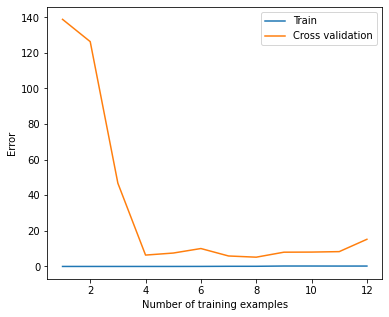

In [34]:
# 非随机选择样本
plot_learning_curve(train_error, cv_error)

In [35]:
def compute_error_random(theta, X, y, Xval, yval, lambda_reg):
    train_error = []
    cv_error = []
    times = 50
    for i in range(1, m + 1):
        te = 0
        cve = 0
        for j in range(times):
            idx = np.random.randint(X.shape[0], size = i)
            X_t = X[idx, :]
            y_t = y[idx, :]
            r_t = train_linear_reg(theta, X_t, y_t, lambda_reg)
            te += cost_func_reg(r_t, X_t, y_t, lambda_reg)
            cve += cost_func_reg(r_t, Xval, yval, lambda_reg)
        train_error.append(te / times)
        cv_error.append(cve / times)
    return train_error, cv_error

In [36]:
train_error, cv_error = compute_error_random(theta, X, y, Xval, yval, lambda_reg)

  NIT   NF   F                       GTG
    0    1  1.072783893135832E+02   8.07016372E+02
tnc: fscale = 0.0176007
    1    4  1.049937646182667E-04   6.32201362E-04
tnc: fscale = 19.8858
    2   13  1.123125204315403E-07   6.76288307E-07
tnc: fscale = 608.001
    3   45  5.907610244040171E-08   2.45619632E-06
    4   58  6.707775906014103E-11   1.11281862E-08
tnc: |fn-fn-1] = 5.65085e-11 -> convergence
    5   83  1.056920994192798E-11   2.40403256E-09
tnc: Converged (|f_n-f_(n-1)| ~= 0)
  NIT   NF   F                       GTG
    0    1  4.369203232802710E+00   1.60976627E+02
tnc: fscale = 0.0394084
    1    4  3.659102347393655E-04   1.22113545E-02
tnc: fscale = 4.52468
    2    9  2.511393455844542E-07   6.33520541E-06
tnc: fscale = 198.65
    3   17  5.258911185045396E-09   1.32650025E-07
tnc: |fn-fn-1] = 5.14964e-09 -> convergence
    4   23  1.092686972950938E-10   2.75490561E-09
tnc: Converged (|f_n-f_(n-1)| ~= 0)
  NIT   NF   F                       GTG
    0    1  4.3948257

    2   16  8.588296237159810E-08   2.11303115E-07
tnc: fscale = 1087.72
    3   31  4.933945104482802E-09   1.21393225E-08
tnc: |fn-fn-1] = 4.65e-09 -> convergence
    4   44  2.839401573541609E-10   6.98890771E-10
tnc: Converged (|f_n-f_(n-1)| ~= 0)
  NIT   NF   F                       GTG
    0    1  2.724492159716859E-01   2.56849010E+01
    1    4  4.431025526239231E-03   4.14853437E-01
    2    7  1.338215353468784E-04   1.21848344E-02
    3   10  1.463382336931182E-06   9.72286730E-05
tnc: fscale = 50.7076
    4   17  4.292471477329697E-10   2.85389078E-08
tnc: fscale = 2959.72
tnc: |fn-fn-1] = 4.29066e-10 -> convergence
    5   24  1.816328711792705E-13   1.20510842E-11
tnc: Converged (|f_n-f_(n-1)| ~= 0)
  NIT   NF   F                       GTG
    0    1  2.356917688847726E+00   1.13783531E+01
    1    4  5.758674391770911E-04   3.07511591E-03
    2   12  3.114039396081791E-07   5.84048164E-06
tnc: fscale = 206.893
    3   24  1.189850348774730E-10   2.23449379E-09
tnc: fscal

  NIT   NF   F                       GTG
    0    1  2.891334935064556E+00   1.95406201E+01
    1    5  1.453801673970762E-04   9.06053693E-04
    2    8  2.191374222448394E-07   1.01567403E-06
tnc: fscale = 496.127
    3   22  1.292508480814219E-08   3.94438180E-07
tnc: |fn-fn-1] = 1.18173e-08 -> convergence
    4   31  1.107785902237597E-09   1.79348120E-11
tnc: Converged (|f_n-f_(n-1)| ~= 0)
  NIT   NF   F                       GTG
    0    1  1.197204655932606E+02   5.30759495E+02
tnc: fscale = 0.0217031
    1    4  4.636391054812238E-03   2.47695960E-04
tnc: fscale = 31.7695
tnc: stepmx = 1000
    2   33  1.976327796850464E-03   5.05720725E-03
tnc: |fn-fn-1] = 0 -> convergence
    3   86  1.976327796850464E-03   5.05720725E-03
tnc: Converged (|f_n-f_(n-1)| ~= 0)
  NIT   NF   F                       GTG
    0    1  1.181489075212097E+02   4.58599005E+02
tnc: fscale = 0.0233482
    1    4  1.161494951945044E-03   2.53884772E-04
tnc: fscale = 31.3799
    1   55  1.161494951945044E-03

    3   22  4.355804184632689E-07   1.39506560E-08
tnc: fscale = 4233.24
tnc: |fn-fn-1] = 3.9826e-09 -> convergence
    4   46  4.315978154703197E-07   9.32137007E-09
tnc: Converged (|f_n-f_(n-1)| ~= 0)
  NIT   NF   F                       GTG
    0    1  5.383606339874728E+00   3.67196261E+01
    1    4  2.594851016225837E-04   2.50986614E-04
tnc: fscale = 31.5606
    2   13  1.343891142823333E-06   2.07551048E-06
    3   20  7.727663382860499E-07   2.06696674E-08
tnc: fscale = 3477.79
    4   25  4.554095461037765E-07   1.39201569E-08
tnc: |fn-fn-1] = 4.95844e-09 -> convergence
    5   28  4.504511053434313E-07   4.81442454E-13
tnc: Converged (|f_n-f_(n-1)| ~= 0)
  NIT   NF   F                       GTG
    0    1  4.818191039801313E+00   2.78637702E+01
    1    5  7.209992927533442E-05   4.58758763E-04
tnc: fscale = 23.3441
    2   12  5.606574388154396E-08   4.19035736E-07
tnc: fscale = 772.404
    2   52  5.606574388154396E-08   4.19035736E-07
tnc: Linear search failed
  NIT   NF 

    4  100  2.003295088506110E-04   4.93964616E-04
tnc: Maximum number of function evaluations reached
  NIT   NF   F                       GTG
    0    1  1.491165717120948E+02   7.67156126E+02
tnc: fscale = 0.0180521
    1    4  9.950961895463363E-01   2.56313623E-01
tnc: fscale = 0.987607
    2    7  9.993601016920184E-03   3.16750344E-02
    3   10  1.543883135591348E-03   5.60210362E-04
tnc: fscale = 21.1249
tnc: stepmx = 1000
    4   41  1.083253856795719E-03   2.47355939E-03
    5   48  1.028413238856290E-03   3.04316415E-04
    6   57  3.945306269844434E-04   3.25144861E-04
    7   84  3.940576877398308E-04   3.06441084E-04
    7  100  3.940576877398308E-04   3.06441084E-04
tnc: Maximum number of function evaluations reached
  NIT   NF   F                       GTG
    0    1  1.500866587647456E+02   7.90569168E+02
tnc: fscale = 0.0177828
    1    4  4.012168883847705E-01   8.88216528E-01
tnc: fscale = 0.530531
    2    7  2.268022255053068E-03   5.46280529E-03
    3   17  1.95

    2   13  1.188796266598496E-06   2.67930131E-06
    3   18  8.379742177246662E-08   1.17634813E-07
tnc: fscale = 1457.81
    4   28  2.757920326976142E-09   2.07187499E-08
tnc: |fn-fn-1] = 7.93627e-10 -> convergence
    5   52  1.964293091335168E-09   4.10994138E-09
tnc: Converged (|f_n-f_(n-1)| ~= 0)
  NIT   NF   F                       GTG
    0    1  2.784354717528377E+02   2.71580243E+03
tnc: fscale = 0.00959447
    1    5  9.693055779534500E-04   3.98541882E-04
tnc: fscale = 25.0457
    2   37  2.003917995463264E-04   2.11518397E-04
tnc: |fn-fn-1] = 4.19037e-18 -> convergence
    3   85  2.003917995463222E-04   2.11518397E-04
tnc: Converged (|f_n-f_(n-1)| ~= 0)
  NIT   NF   F                       GTG
    0    1  5.048867577920017E+00   2.60641132E+01
    1    5  8.322981357883119E-06   1.00578917E-04
tnc: fscale = 49.8559
    2   17  9.005314109299996E-07   3.23390848E-06
    3   22  4.531464671551271E-07   7.98780615E-06
    3   64  4.531464671551271E-07   7.98780615E-06
tnc:

    2   13  4.014112927762073E-04   1.08449842E-04
    3   39  5.048535624172193E-05   2.00576670E-04
tnc: |fn-fn-1] = 1.60937e-18 -> convergence
    4   84  5.048535624172032E-05   2.00576670E-04
tnc: Converged (|f_n-f_(n-1)| ~= 0)
  NIT   NF   F                       GTG
    0    1  1.736363930452872E+02   9.69370419E+02
tnc: fscale = 0.0160592
    1    4  6.597166220553971E+00   7.32744128E-01
tnc: fscale = 0.584109
    2    8  1.367166142430099E-02   3.45789241E-05
tnc: fscale = 85.0285
tnc: |fn-fn-1] = 0 -> convergence
    3   63  1.367166142430099E-02   3.45789241E-05
tnc: Converged (|f_n-f_(n-1)| ~= 0)
  NIT   NF   F                       GTG
    0    1  6.381728976261749E+01   2.23310804E+02
tnc: fscale = 0.0334592
tnc: stepmx = 1000
    1    5  2.846244109817311E-02   1.71769359E-04
tnc: fscale = 38.1502
tnc: |fn-fn-1] = 5.82027e-18 -> convergence
    2   60  2.846244109817310E-02   1.71769359E-04
tnc: Converged (|f_n-f_(n-1)| ~= 0)
  NIT   NF   F                       GTG
   

tnc: |fn-fn-1] = 1.08425e-18 -> convergence
    4   63  2.066694657640772E-04   2.70416128E-06
tnc: Converged (|f_n-f_(n-1)| ~= 0)
  NIT   NF   F                       GTG
    0    1  2.935501889882677E+01   4.04067706E+01
    1    6  6.020612445947368E-03   1.00708630E-05
tnc: fscale = 157.557
tnc: |fn-fn-1] = 8.17394e-17 -> convergence
    2   60  6.020612445947287E-03   1.00708630E-05
tnc: Converged (|f_n-f_(n-1)| ~= 0)
  NIT   NF   F                       GTG
    0    1  3.084476659837591E+01   9.81341363E+01
tnc: stepmx = 1000
    1    6  2.448537156583416E-01   3.63274492E-01
    2   11  7.819544109550475E-02   1.25261214E-05
tnc: fscale = 141.274
tnc: |fn-fn-1] = 2.13756e-16 -> convergence
    3   62  7.819544109550454E-02   1.25261214E-05
tnc: Converged (|f_n-f_(n-1)| ~= 0)
  NIT   NF   F                       GTG
    0    1  2.788157421572445E+02   2.43409240E+03
tnc: fscale = 0.0101345
    1    4  4.995574146146722E-01   3.07500479E-01
tnc: fscale = 0.901669
    2    7  1.629

    3   68  2.096039905878863E-01   9.33302931E-05
tnc: Linear search failed
  NIT   NF   F                       GTG
    0    1  8.971972652861922E+01   2.24119826E+02
tnc: fscale = 0.0333987
    1    5  2.822577431516501E-01   1.30140952E-03
tnc: fscale = 13.86
    2    9  6.194461177447418E-02   6.86753138E-04
    3   13  6.114620695721695E-02   4.49233125E-06
    3   63  6.114620695721695E-02   4.49233125E-06
tnc: Linear search failed
  NIT   NF   F                       GTG
    0    1  1.036418472565510E+02   3.01197031E+02
tnc: fscale = 0.0288101
    1    5  5.824343794701565E-01   1.88910550E-01
tnc: fscale = 1.15038
    2    9  1.325247758839464E-02   1.25633816E-02
    3   14  4.519903653196076E-03   1.96648400E-06
tnc: fscale = 356.554
    3   68  4.519903653196076E-03   1.96648400E-06
tnc: Linear search failed
  NIT   NF   F                       GTG
    0    1  1.784311139017054E+02   1.14319505E+03
tnc: fscale = 0.014788
    1    5  4.189783993676412E-03   1.55225633E-03
t

    5   65  4.658136314230931E-03   2.51079281E-07
tnc: Linear search failed
  NIT   NF   F                       GTG
    0    1  1.988221362486294E+02   1.31661603E+03
tnc: fscale = 0.0137797
    1    4  1.465862608618359E+00   1.00529330E-01
tnc: fscale = 1.57697
    2    9  4.279867227328951E-03   5.53530915E-05
tnc: fscale = 67.2046
tnc: |fn-fn-1] = 3.63441e-17 -> convergence
    3   62  4.279867227328915E-03   5.53530915E-05
tnc: Converged (|f_n-f_(n-1)| ~= 0)
  NIT   NF   F                       GTG
    0    1  1.681692086642569E+02   9.68026191E+02
tnc: fscale = 0.0160704
    1    5  5.457600092557663E-02   5.49916915E-04
tnc: fscale = 21.3217
    2    8  3.862224457554042E-03   1.70564246E-03
    3   13  3.290664083461099E-03   8.43722587E-07
tnc: fscale = 544.34
tnc: |fn-fn-1] = 3.34491e-17 -> convergence
    4   64  3.290664083461066E-03   8.43722587E-07
tnc: Converged (|f_n-f_(n-1)| ~= 0)
  NIT   NF   F                       GTG
    0    1  8.468141872874730E+01   2.10298200

    8   33  4.052394393724065E-02   1.85326253E-09
    9   38  4.049322214453734E-02   2.53739311E-08
   10   41  4.049082976878226E-02   5.51105072E-10
tnc: fscale = 21298.7
   10   76  4.049082976878227E-02   5.51105072E-10
tnc: Linear search failed
  NIT   NF   F                       GTG
    0    1  1.101729875930113E+02   3.42979526E+02
tnc: fscale = 0.0269983
    1    5  7.327479695478015E-01   1.35236938E-01
tnc: fscale = 1.35964
    2    8  4.432078770126935E-01   3.15988087E-02
    3   13  6.009896822792637E-03   6.13678874E-06
tnc: fscale = 201.836
    4   18  4.727262632616413E-03   1.41722194E-04
    5   21  4.556579663918273E-03   6.59406663E-05
    5   73  4.556579663918273E-03   6.59406663E-05
tnc: Linear search failed
  NIT   NF   F                       GTG
    0    1  1.080633110423589E+02   3.06816031E+02
tnc: fscale = 0.0285451
    1    4  2.587989425979578E+00   1.61985058E-01
tnc: fscale = 1.24232
    2    9  5.346122046548769E-03   6.35964022E-05
tnc: fscale = 62

tnc: |fn-fn-1] = 5.63923e-17 -> convergence
    3   59  7.266476335052557E-02   3.93676308E-06
tnc: Converged (|f_n-f_(n-1)| ~= 0)
  NIT   NF   F                       GTG
    0    1  8.076635634579736E+01   1.81625633E+02
tnc: fscale = 0.0371006
    1    5  4.706328486400089E-01   6.43894958E-02
tnc: fscale = 1.97044
    2    8  2.809868098308055E-01   8.63442331E-02
    3   13  3.793818911465398E-03   2.16411614E-05
tnc: fscale = 107.481
    4   18  2.047391259754258E-03   6.37473726E-04
    5   21  1.277877343834134E-03   4.21795198E-04
tnc: |fn-fn-1] = 2.78897e-17 -> convergence
    6   75  1.277877343834106E-03   4.21795198E-04
tnc: Converged (|f_n-f_(n-1)| ~= 0)
  NIT   NF   F                       GTG
    0    1  1.126885583160602E+02   4.35184044E+02
tnc: fscale = 0.0239681
    1    4  4.198581722792024E+00   4.09571775E-01
tnc: fscale = 0.781277
    2    7  1.850339951502590E+00   7.72113437E-01
    3   11  1.851385759813645E-01   6.13260402E-04
tnc: fscale = 20.1905
    4   1

tnc: |fn-fn-1] = 1.65367e-16 -> convergence
    8   74  9.843701307881533E-02   3.85983175E-06
tnc: Converged (|f_n-f_(n-1)| ~= 0)
  NIT   NF   F                       GTG
    0    1  1.122063196258640E+02   4.57846580E+02
tnc: fscale = 0.0233674
    1    4  6.020866521366438E+00   1.92225455E+00
    2    8  1.369971598447173E-01   8.70343701E-04
tnc: fscale = 16.9482
    3   13  3.194555769833390E-02   1.58609671E-03
    4   16  3.000935009655923E-02   3.66822140E-04
    5   21  2.361337003662881E-02   4.05621460E-07
tnc: fscale = 785.072
    6   26  2.306935166559274E-02   3.14140935E-06
    6   73  2.306935166559274E-02   3.14140935E-06
tnc: Linear search failed
  NIT   NF   F                       GTG
    0    1  7.001402455824767E+01   1.36583277E+02
tnc: fscale = 0.042783
    1    5  4.533065990248463E-01   4.03046202E-02
tnc: fscale = 2.49053
    2    9  2.671824308345023E-01   5.65784555E-02
    3   14  2.239525595297891E-02   4.72047709E-05
tnc: fscale = 72.7741
    4   17  1.

tnc: |fn-fn-1] = 3.23813e-16 -> convergence
    4   63  9.721464083138419E-02   1.12461215E-04
tnc: Converged (|f_n-f_(n-1)| ~= 0)
  NIT   NF   F                       GTG
    0    1  1.073718862677397E+02   3.96157115E+02
tnc: fscale = 0.025121
    1    5  9.031130679849567E-02   1.96810451E-03
tnc: fscale = 11.2706
    2   10  3.354806676013553E-02   3.43545988E-02
    3   13  1.189943003585365E-02   5.27763135E-04
    4   18  8.181015322863432E-03   1.96641813E-08
tnc: fscale = 3565.6
    4   65  8.181015322863432E-03   1.96641813E-08
tnc: Linear search failed
  NIT   NF   F                       GTG
    0    1  1.607417317644691E+02   9.15888976E+02
tnc: fscale = 0.0165215
    1    5  2.524339866271442E-01   2.16629620E-03
tnc: fscale = 10.7426
    2    8  2.057696707375618E-01   6.83749397E-03
    3   13  1.014193454236947E-01   4.34384475E-05
    4   18  8.313165700691619E-02   5.37327337E-08
tnc: fscale = 2157
tnc: |fn-fn-1] = 3.95295e-17 -> convergence
    5   63  8.31316570069

tnc: |fn-fn-1] = 1.55905e-16 -> convergence
    6   72  8.259100030170640E-03   7.77030036E-05
tnc: Converged (|f_n-f_(n-1)| ~= 0)
  NIT   NF   F                       GTG
    0    1  1.646687555453612E+01   2.41497723E+01
    1    6  4.138993104632478E-03   3.12040846E-06
tnc: fscale = 283.051
    2   10  3.687556717907152E-03   3.98247839E-06
    3   13  3.670993311451717E-03   4.81483227E-07
    4   18  3.565061934677782E-03   2.67596591E-04
    4   67  3.565061934677782E-03   2.67596591E-04
tnc: Linear search failed
  NIT   NF   F                       GTG
    0    1  1.592953142809619E+02   7.84808888E+02
tnc: fscale = 0.0178479
    1    4  7.667487071225670E+00   7.03094905E+00
    2    7  3.680322860062427E+00   4.18979928E-01
tnc: fscale = 0.772455
    3   12  1.021767851685540E+00   2.65257870E-02
    4   17  3.222810279336732E-02   4.78240160E-06
tnc: fscale = 228.637
    5   21  2.868628261902722E-02   4.49360717E-05
    6   24  2.856825390506590E-02   1.33729131E-05
tnc: |f

    4   19  4.846003836334431E-02   7.79116738E-07
tnc: fscale = 566.459
tnc: |fn-fn-1] = 1.69338e-16 -> convergence
    5   68  4.846003836334414E-02   7.79116738E-07
tnc: Converged (|f_n-f_(n-1)| ~= 0)
  NIT   NF   F                       GTG
    0    1  1.434980198653460E+02   5.47965482E+02
tnc: fscale = 0.0213596
    1    5  1.464922133276340E+00   5.66903977E-01
tnc: fscale = 0.664072
    2    8  6.125895907317865E-01   7.20397948E-02
    3   13  1.020572715141270E-01   2.71518074E-04
tnc: fscale = 30.3438
    4   18  5.406009056898889E-02   6.59717837E-05
    5   23  3.751293946123324E-02   2.87234176E-05
    6   26  3.733594932594800E-02   1.52505070E-06
tnc: |fn-fn-1] = 1.24399e-16 -> convergence
    7   75  3.733594932594788E-02   1.52505070E-06
tnc: Converged (|f_n-f_(n-1)| ~= 0)
  NIT   NF   F                       GTG
    0    1  1.059887774246655E+02   3.60948713E+02
tnc: fscale = 0.0263177
    1    5  3.294603095453980E-01   5.36793903E-03
tnc: fscale = 6.82443
    2    

    5   24  1.368618160751204E-01   2.64530633E-04
    6   27  1.349317908868525E-01   3.34748886E-04
    7   31  1.346684058980405E-01   1.90677823E-06
    8   36  1.320117934078937E-01   2.38434330E-07
    8   78  1.320117934078937E-01   2.38434330E-07
tnc: Linear search failed
  NIT   NF   F                       GTG
    0    1  9.055069656678836E+01   2.68866467E+02
tnc: fscale = 0.0304931
    1    5  1.338843783895569E-01   1.02338649E-02
tnc: fscale = 4.94254
    2    8  9.138017950261500E-02   5.90132131E-04
    3   13  2.408507749141846E-02   2.46863273E-05
tnc: fscale = 100.633
    4   18  1.826919836424077E-02   7.47587827E-04
    5   23  1.469549597219546E-02   2.04243950E-06
    5   75  1.469549597219546E-02   2.04243950E-06
tnc: Linear search failed
  NIT   NF   F                       GTG
    0    1  9.655248416782089E+01   3.59502980E+02
tnc: fscale = 0.0263705
    1    4  4.000377363860957E+00   5.48140203E-01
tnc: fscale = 0.675343
    2    7  2.540502540224216E+00   6

    0    1  1.038029605172966E+02   3.32839511E+02
tnc: fscale = 0.0274064
    1    5  2.141695367955581E+00   1.72832965E-01
tnc: fscale = 1.2027
    2    9  9.816691151052319E-01   6.98247239E-01
    3   14  3.121009627785689E-01   1.68141321E-03
    4   19  1.325435259960474E-01   7.38269348E-05
tnc: fscale = 58.1919
    5   24  1.106820824498717E-01   5.71601162E-05
    6   29  1.073402009879020E-01   4.13435969E-04
    7   32  1.051873188116613E-01   1.06794162E-03
    8   37  9.260059573711638E-02   4.25815633E-05
    9   42  9.128582739834784E-02   9.01077407E-07
   10   46  9.125503279641713E-02   1.49434299E-07
tnc: fscale = 1293.44
   11   49  9.125375881435337E-02   3.47918829E-08
   11   92  9.125375881435337E-02   3.47918829E-08
tnc: Linear search failed
  NIT   NF   F                       GTG
    0    1  1.548272331572762E+02   8.29577752E+02
tnc: fscale = 0.0173597
    1    5  1.183491302222359E+00   5.13738867E-02
tnc: fscale = 2.20597
    2    8  7.734113727660045E-01

tnc: fscale = 0.647484
    2    9  1.504930235919619E+00   6.24408245E-01
    3   14  2.418435816687055E-01   7.69535249E-05
tnc: fscale = 56.9975
    4   18  2.163829274440366E-01   8.16869363E-03
    5   23  1.974956885055948E-01   1.67280598E-04
    6   28  1.877113439036744E-01   3.26467536E-06
    7   33  1.850450651367145E-01   4.30799580E-05
    8   36  1.843779756456544E-01   7.64947586E-05
    9   40  1.843041495908961E-01   1.60398034E-07
tnc: fscale = 1248.45
   10   45  1.841945666624513E-01   3.77609428E-08
   11   48  1.841913375435630E-01   2.14755777E-08
   11   82  1.841913375435630E-01   2.14755777E-08
tnc: Linear search failed
  NIT   NF   F                       GTG
    0    1  4.695444259171744E+01   8.58981421E+01
    1    5  3.117405176804678E-01   2.12912725E-02
    2    8  2.710760741681944E-01   7.52086451E-03
    3   13  1.200297197395367E-01   4.83959258E-06
tnc: fscale = 227.282
    4   18  1.194929081137381E-01   1.59387969E-06
    5   21  1.19492018885670

    7   32  1.217989535743679E-01   9.39460038E-05
    8   35  1.021775235767933E-01   4.22473271E-04
    9   39  1.012820874702041E-01   3.64760854E-06
   10   42  1.012220278039733E-01   2.21775377E-06
tnc: |fn-fn-1] = 5.17728e-09 -> convergence
   11   59  1.012220226266980E-01   1.71297051E-06
tnc: Converged (|f_n-f_(n-1)| ~= 0)
  NIT   NF   F                       GTG
    0    1  1.800231408873672E+02   9.63272437E+02
tnc: fscale = 0.01611
    1    5  3.337571719621667E+00   8.21511616E-01
tnc: fscale = 0.551649
    2    9  5.506783017317851E-01   2.81735654E-01
    3   14  1.501480310266126E-03   2.39302765E-06
tnc: fscale = 323.218
    4   19  1.029055004611248E-03   2.56899148E-05
    5   24  7.893817275766691E-04   1.06071890E-05
tnc: |fn-fn-1] = 5.10083e-17 -> convergence
    6   77  7.893817275766181E-04   1.06071890E-05
tnc: Converged (|f_n-f_(n-1)| ~= 0)
  NIT   NF   F                       GTG
    0    1  7.372337286891552E+01   2.77985216E+02
tnc: fscale = 0.0299888
    

    3   13  2.576539398622322E-01   1.14465486E-03
tnc: fscale = 14.7786
    4   18  2.007066772470123E-01   1.39659449E-02
    5   23  1.172646122702984E-01   1.16847576E-04
    6   26  1.104004444016288E-01   6.00562602E-04
    7   31  9.341088700606358E-02   1.08928023E-03
    8   34  8.392143870542326E-02   4.83531957E-05
    9   52  8.391808285065286E-02   1.47077965E-05
    9   93  8.391808285065286E-02   1.47077965E-05
tnc: Linear search failed
  NIT   NF   F                       GTG
    0    1  8.030805181611404E+01   2.23463829E+02
tnc: fscale = 0.0334477
    1    5  2.665350710907659E+00   2.03546723E-01
tnc: fscale = 1.10825
    2   10  8.069084046335503E-01   4.19298311E-01
    3   13  2.444163287701478E-01   1.13365052E-01
    4   18  8.716984276364997E-03   1.42533262E-08
tnc: fscale = 4188.05
    5   23  8.713662914739784E-03   9.98039933E-08
tnc: |fn-fn-1] = 3.73251e-17 -> convergence
    6   63  8.713662914739748E-03   9.98039933E-08
tnc: Converged (|f_n-f_(n-1)| ~= 0

    5   71  1.001062905670815E-01   1.96954011E-05
tnc: Linear search failed
  NIT   NF   F                       GTG
    0    1  9.277576640971093E+01   3.04267022E+02
tnc: fscale = 0.0286644
    1    5  9.261315588215683E-01   1.13303866E-01
tnc: fscale = 1.48541
    2    9  3.558437831897863E-01   5.00323404E-02
    3   14  2.359552312678875E-01   9.08705605E-04
    4   19  3.569505060218361E-02   4.15826190E-07
tnc: fscale = 775.379
    5   24  3.563225087903994E-02   1.31210144E-06
tnc: |fn-fn-1] = 4.71936e-16 -> convergence
    6   67  3.563225087903947E-02   1.31210144E-06
tnc: Converged (|f_n-f_(n-1)| ~= 0)
  NIT   NF   F                       GTG
    0    1  1.006224900944060E+02   3.16569756E+02
tnc: fscale = 0.0281019
    1    5  1.367427912040008E+00   1.89092359E-01
tnc: fscale = 1.14983
    2    9  7.960679167936685E-01   3.68216362E-01
    3   14  1.900628467712279E-01   1.61540818E-04
tnc: fscale = 39.3395
    4   19  1.572326486327509E-01   3.10179749E-04
    5   22  1

    4   17  8.448197656823525E-02   2.52195076E-04
    5   22  6.143056996853515E-02   7.14831066E-07
tnc: fscale = 591.382
    6   27  6.048384446530890E-02   8.84689301E-08
    6   70  6.048384446530890E-02   8.84689301E-08
tnc: Linear search failed
  NIT   NF   F                       GTG
    0    1  1.267447782432831E+02   4.37241191E+02
tnc: fscale = 0.0239116
    1    5  2.889212655496363E+00   4.36419529E-01
tnc: fscale = 0.756864
    2    9  3.115892105387761E-01   4.42595931E-01
    3   14  2.813237414917447E-03   4.25668362E-06
tnc: fscale = 242.345
    4   17  2.543528890180526E-03   3.08867098E-04
    5   22  1.313193701896109E-03   1.04614216E-06
tnc: |fn-fn-1] = 2.38221e-17 -> convergence
    6   68  1.313193701896086E-03   1.04614216E-06
tnc: Converged (|f_n-f_(n-1)| ~= 0)
  NIT   NF   F                       GTG
    0    1  6.344742761833115E+01   9.98358585E+01
tnc: fscale = 0.0500411
    1    5  2.199366651121264E+00   1.25070506E-01
tnc: fscale = 1.41381
    2    9  

    3   12  1.819934239152790E-01   2.33701963E-03
    4   17  6.972388718855882E-02   5.93903335E-06
tnc: fscale = 205.169
    5   22  6.734445846901507E-02   1.20608344E-06
    6   27  6.674521826592460E-02   4.39173461E-06
    7   31  6.669596478003950E-02   9.02102158E-07
    8   36  6.635783340775876E-02   6.65137392E-07
    9   40  6.635730638353667E-02   1.56829597E-06
tnc: |fn-fn-1] = 8.65801e-17 -> convergence
   10   86  6.635730638353658E-02   1.56829597E-06
tnc: Converged (|f_n-f_(n-1)| ~= 0)
  NIT   NF   F                       GTG
    0    1  4.275383865871326E+01   5.95891777E+01
    1    5  3.375976706863513E-01   9.27479375E-03
    2   10  7.382255845322380E-02   9.77745315E-06
tnc: fscale = 159.903
    3   15  6.655267131279614E-02   6.54426225E-06
tnc: |fn-fn-1] = 5.55448e-17 -> convergence
    4   57  6.655267131279609E-02   6.54426225E-06
tnc: Converged (|f_n-f_(n-1)| ~= 0)
  NIT   NF   F                       GTG
    0    1  1.279632705920254E+02   5.39036427E+02


    4   19  1.218866391601404E-01   4.86163194E-07
    5   24  1.217416855558469E-01   1.75128372E-05
    6   27  1.217405528665757E-01   1.43409697E-08
tnc: fscale = 4175.23
    6   59  1.217405528665757E-01   1.43409697E-08
tnc: Linear search failed
  NIT   NF   F                       GTG
    0    1  1.050852773155152E+02   3.59168688E+02
tnc: fscale = 0.0263828
    1    5  1.869248035309473E+00   1.16529089E-01
tnc: fscale = 1.46471
    2    9  8.002507439855633E-01   1.92049315E-01
    3   14  3.756999259653547E-01   1.88268912E-03
    4   19  3.744247881531262E-02   5.72266522E-07
tnc: fscale = 660.953
    5   24  3.689850448443105E-02   1.94027270E-07
    6   27  3.689388577974429E-02   6.13445908E-07
    7   32  3.687487216359596E-02   1.97108205E-08
    7   72  3.687487216359596E-02   1.97108205E-08
tnc: Linear search failed
  NIT   NF   F                       GTG
    0    1  1.369350303458399E+02   5.65832137E+02
tnc: fscale = 0.0210197
    1    4  5.030809364688086E+00   2.

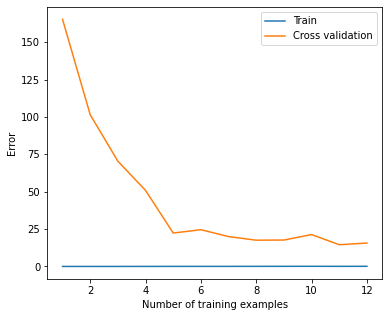

In [37]:
# 随机选择样本
plot_learning_curve(train_error, cv_error)